In [1]:
from sklearn import cross_validation, linear_model, metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df = df.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
df = df.dropna() 

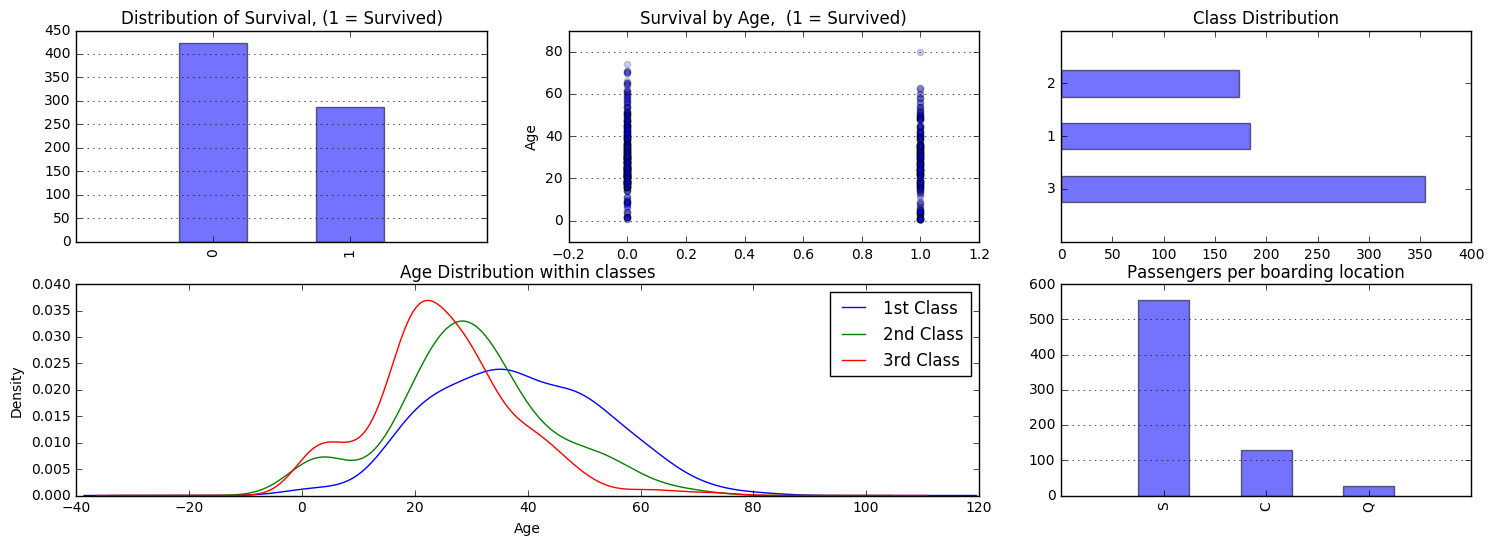

In [4]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

ax1 = plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.grid(b=True, which='major', axis='y')  
plt.title("Distribution of Survival, (1 = Survived)") 

ax2 = plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
plt.ylabel("Age")
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
plt.grid(b=True, which='major', axis='y')  
plt.title("Passengers per boarding location")

(-1, 2)

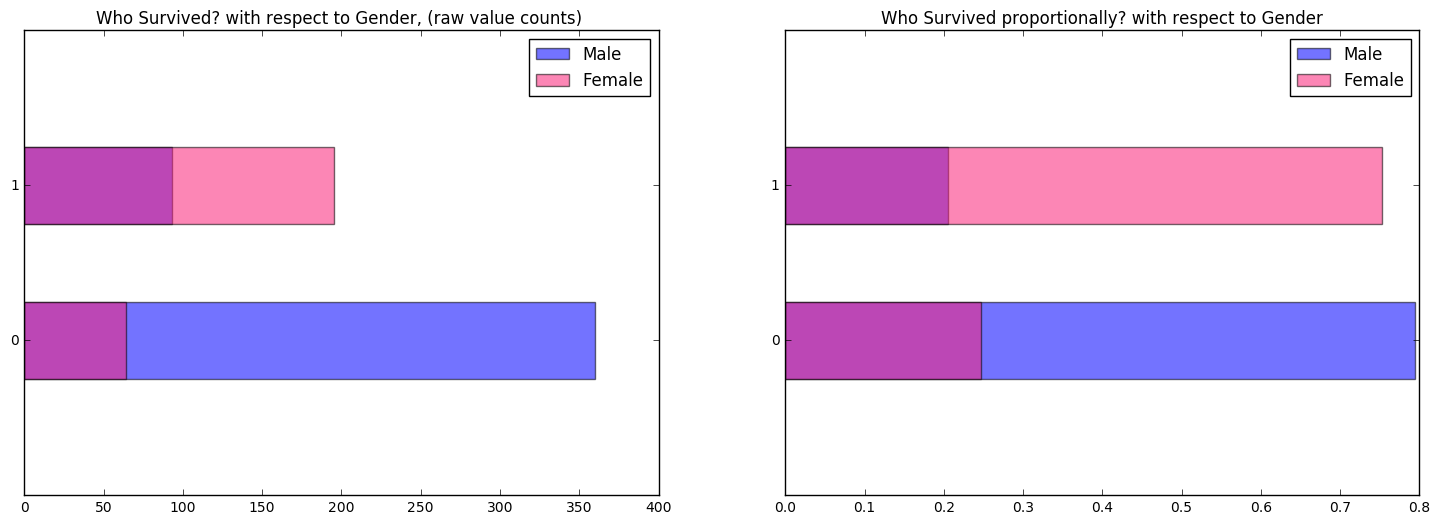

In [5]:
fig = plt.figure(figsize=(18,6))

df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) ")
plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender")
plt.legend(loc='best')
ax2.set_ylim(-1, 2)

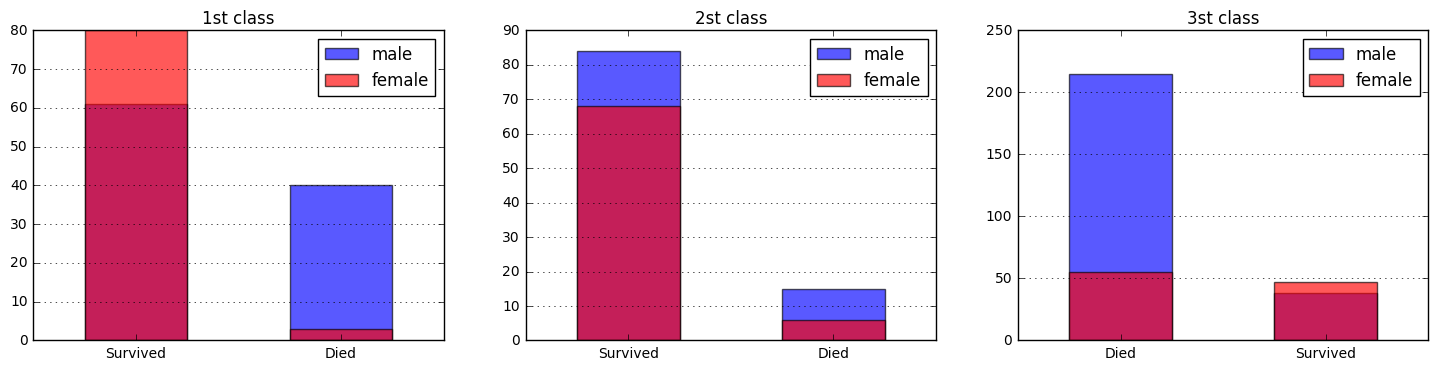

In [21]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(131)
df_male_1s = df.Survived[df.Sex == 'male'][df.Pclass == 1].value_counts()
df_male_1s.plot(kind='bar', label='male', color='blue', alpha=alpha_level)
df_female_1s = df.Survived[df.Sex == 'female'][df.Pclass == 1].value_counts()
df_female_1s.plot(kind='bar', label='female', color='red', alpha=alpha_level)
plt.grid(b=True, which='major', axis='y')  
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
plt.title('1st class')
plt.legend(loc='best')

ax2=fig.add_subplot(132)
df_male_2s = df.Survived[df.Sex == 'male'][df.Pclass == 2].value_counts()
df_male_2s.plot(kind='bar', label='male', color='blue', alpha=alpha_level)
df_female_2s = df.Survived[df.Sex == 'female'][df.Pclass == 2].value_counts()
df_female_2s.plot(kind='bar', label='female', color='red', alpha=alpha_level)
plt.grid(b=True, which='major', axis='y')  
ax2.set_xticklabels(["Survived", "Died"], rotation=0)
plt.title('2st class')
plt.legend(loc='best')

ax3=fig.add_subplot(133)
df_male_3s = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
df_male_3s.plot(kind='bar', label='male', color='blue', alpha=alpha_level)
df_female_3s = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
df_female_3s.plot(kind='bar', label='female', color='red', alpha=alpha_level)
plt.grid(b=True, which='major', axis='y')  
ax3.set_xticklabels(["Died", "Survived"], rotation=0)
plt.title('3st class')
plt.legend(loc='best')


In [7]:
X = df.ix[:, ['Sex', 'Pclass']]
X['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
y = df['Survived']

X[:3]

,Sex,Pclass
0,1,3
1,0,1
2,0,3


In [8]:
X_train, X_hold, y_train, y_hold = cross_validation.train_test_split(X, y,
                                                                    test_size=0.3,
                                                                    random_state=42)

In [9]:
classifier = linear_model.RidgeClassifier()
cv_score = cross_validation.cross_val_score(classifier, X_train, y_train, scoring='accuracy')
print('CV(accuracy):', cv_score)
print('mean:', cv_score.mean())

CV(accuracy): [ 0.76047904  0.84337349  0.76969697]
mean: 0.79118316853


In [10]:
# overfitting
classifier.fit(X_train, y_train)
metrics.accuracy_score(classifier.predict(X_train), y_train)

0.79116465863453811

In [11]:
classifier.fit(X_train, y_train)
metrics.accuracy_score(classifier.predict(X_hold), y_hold)


0.75233644859813087

In [12]:
classifier.fit(X_train, y_train)
# print(classifier.p)
print(classifier.predict(X_hold))
print(y_hold.reshape(1, -1))


[1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
[[1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0
  0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0
  0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1
  1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1
  1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0
  0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0]]


In [13]:
# best: 0.787058158236 //gender model

In [15]:
classifier.fit(X, y)
test = pd.read_csv('data/test.csv')

X_test = test.ix[:, ['Sex', 'Pclass']]
X_test['Sex'] = test['Sex'].apply(lambda x: 1 if x == 'male' else 0)

submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = classifier.predict(X_test)
submission.to_csv('submission.csv', index=False)